In [8]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
# load the dataset

data = pd.read_csv("loan_data.csv")

In [14]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [18]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [20]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

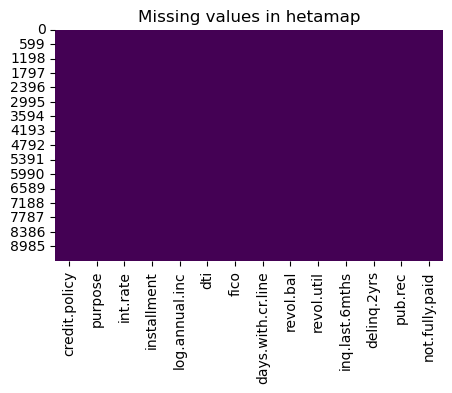

In [28]:
# visaulize the missing values using heatmap

plt.figure(figsize = (5,3))
sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis' )
plt.title("Missing values in hetamap")
plt.show()

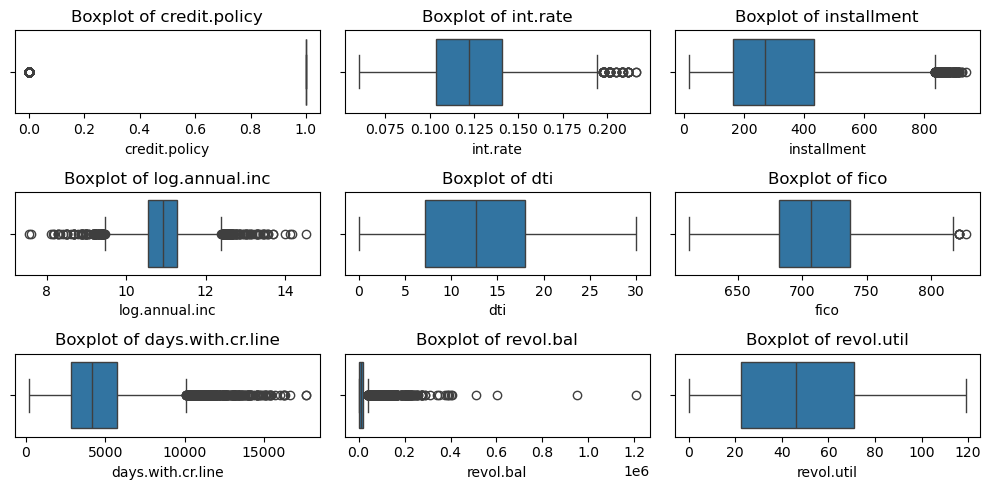

In [48]:
# visualize the outliers using boxplots for numerical columns
numerical_columns = ['credit.policy','int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [36]:
# Data Preprocessing
# Encode categorical variables
le = LabelEncoder()
data['purpose'] = le.fit_transform(data['purpose'])

In [38]:
data.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


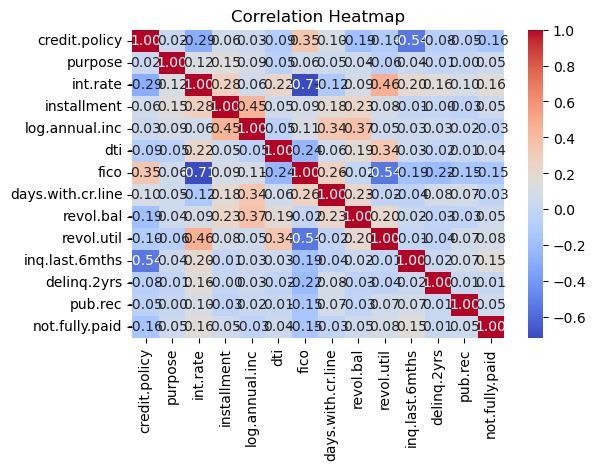

In [89]:
# Correlation Heatmap for Feature Relationships
plt.figure(figsize=(6, 4))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [42]:
# Step: Removing outliers using IQR

# Define a function to remove outliers using IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile (Q1)
        Q3 = df[col].quantile(0.75)  # 75th percentile (Q3)
        IQR = Q3 - Q1  # Interquartile range (IQR)
        
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound
        
        # Remove rows with outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df

# Apply the function to remove outliers from numerical columns
numerical_columns = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']
data_cleaned = remove_outliers(data, numerical_columns)

# Check the shape of the data after outlier removal
print("Data shape before outlier removal:", data.shape)
print("Data shape after outlier removal:", data_cleaned.shape)


Data shape before outlier removal: (9578, 14)
Data shape after outlier removal: (8090, 14)


In [46]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8090 entries, 0 to 9576
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      8090 non-null   int64  
 1   purpose            8090 non-null   int32  
 2   int.rate           8090 non-null   float64
 3   installment        8090 non-null   float64
 4   log.annual.inc     8090 non-null   float64
 5   dti                8090 non-null   float64
 6   fico               8090 non-null   int64  
 7   days.with.cr.line  8090 non-null   float64
 8   revol.bal          8090 non-null   int64  
 9   revol.util         8090 non-null   float64
 10  inq.last.6mths     8090 non-null   int64  
 11  delinq.2yrs        8090 non-null   int64  
 12  pub.rec            8090 non-null   int64  
 13  not.fully.paid     8090 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 916.4 KB


In [54]:
# Split into features and target variable
X = data_cleaned.drop(columns=['not.fully.paid'])  # Features (exclude target column)
y = data_cleaned['not.fully.paid']  # Target

In [56]:
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [94]:
# Train the Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [127]:
# Evaluate the Model
y_pred = clf.predict(X_test)

In [129]:
# Display the predicted values
print("Predicted Values:\n", y_pred)

Predicted Values:
 [0 0 0 ... 0 0 0]


In [135]:
# Compare with actual values (optional, to check how well the model performs)
print("Actual Values:\n",y_test.values)

Actual Values:
 [0 0 0 ... 0 0 0]


In [ ]:
# Convert predicted and actual values into a DataFrame for a column view
comparison_df = pd.DataFrame({
    'Predicted Values': y_pred,
    'Actual Values': y_test.values
})

# Display the DataFrame
print(comparison_df)

In [98]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 74.78%


In [100]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1152  234]
 [ 174   58]]


In [102]:
# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1386
           1       0.20      0.25      0.22       232

    accuracy                           0.75      1618
   macro avg       0.53      0.54      0.54      1618
weighted avg       0.77      0.75      0.76      1618



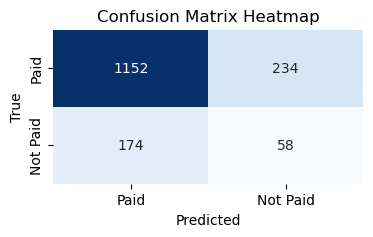

In [104]:
# Visualization of Confusion Matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Paid', 'Not Paid'], yticklabels=['Paid', 'Not Paid'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

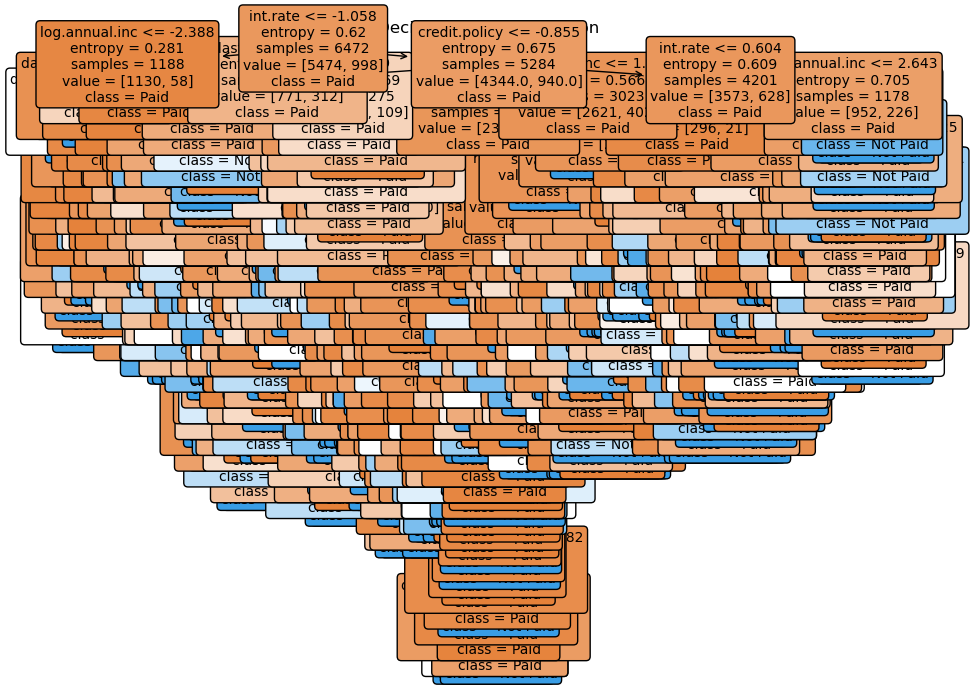

In [125]:
# Visualization of Decision Tree
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=data.columns[:-1], class_names=['Paid', 'Not Paid'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [115]:
if accuracy < 0.80:
    clf_tuned = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, min_samples_split=10, random_state=42)
    clf_tuned.fit(X_train, y_train)
    y_pred_tuned = clf_tuned.predict(X_test)

    cm_tuned = confusion_matrix(y_test, y_pred_tuned)
    cr_tuned = classification_report(y_test, y_pred_tuned)
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

    print("\nTuned Model - Confusion Matrix:\n", cm_tuned)
    print("Tuned Model - Classification Report:\n", cr_tuned)
    print("Tuned Model - Accuracy: {:.2f}%".format(accuracy_tuned * 100))


Tuned Model - Confusion Matrix:
 [[1378    8]
 [ 224    8]]
Tuned Model - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1386
           1       0.50      0.03      0.06       232

    accuracy                           0.86      1618
   macro avg       0.68      0.51      0.49      1618
weighted avg       0.81      0.86      0.80      1618

Tuned Model - Accuracy: 85.66%


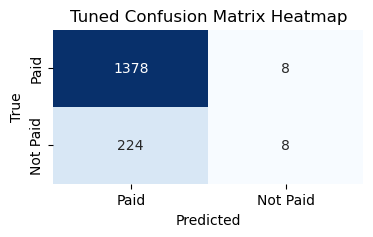

In [121]:
# Visualize Tuned Confusion Matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Paid', 'Not Paid'], yticklabels=['Paid', 'Not Paid'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Tuned Confusion Matrix Heatmap")
plt.show()


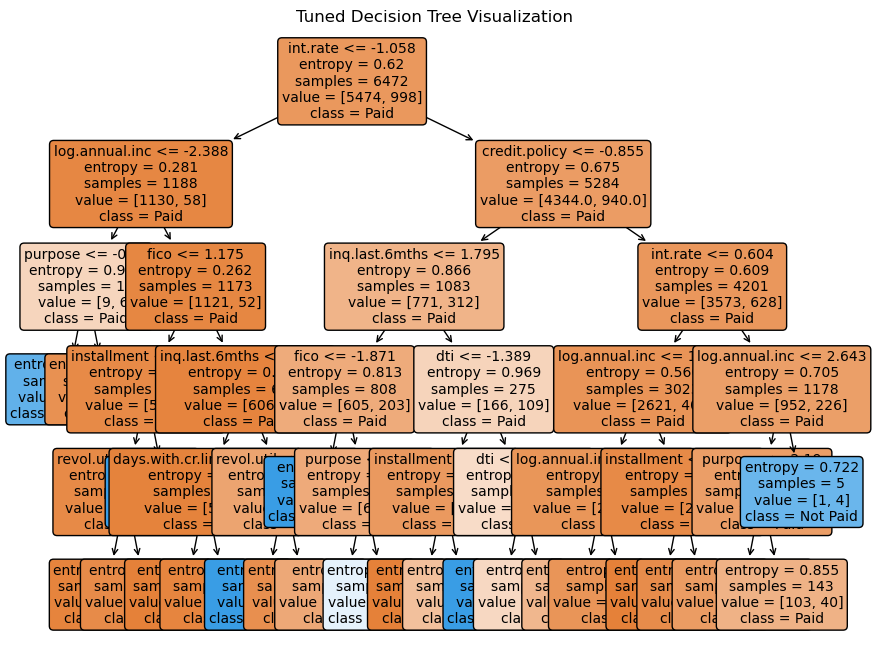

In [123]:
# Visualize Tuned Decision Tree
plt.figure(figsize=(10, 8))
plot_tree(clf_tuned, feature_names=data.columns[:-1], class_names=['Paid', 'Not Paid'], filled=True, rounded=True, fontsize=10)
plt.title("Tuned Decision Tree Visualization")
plt.show()